In [1]:
#Import thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

sns.set_style("whitegrid")
np.random.seed(42)

In [2]:
#Đọc database
df = pd.read_excel("C:\\Users\\ADMIN\\Desktop\\CONTEST\\RBAC(1)\\Dataset.xlsx", sheet_name='Source')

In [3]:
df

,month,vertical,Source,dau
0,2020-01-01,GEN,Email,50004
1,2020-01-01,GEN,Direct,216981
2,2020-01-01,GEN,Social,51476
3,2020-01-01,GEN,(Other),53090
4,2020-01-01,GEN,Display,52508
...,...,...,...,...
477,2022-06-01,ELT,(Other),112510
478,2022-06-01,ELT,Display,93327
479,2022-06-01,ELT,Referral,52178
480,2022-06-01,ELT,Paid Search,77052


In [6]:
#Thêm trường Month_of_year
df['month_of_year'] = df['month'].dt.month

In [10]:
#Nhập dữ liệu của trục x và trục y
x = df[['month_of_year']]
y = df[['dau']]

<function matplotlib.pyplot.show(close=None, block=None)>

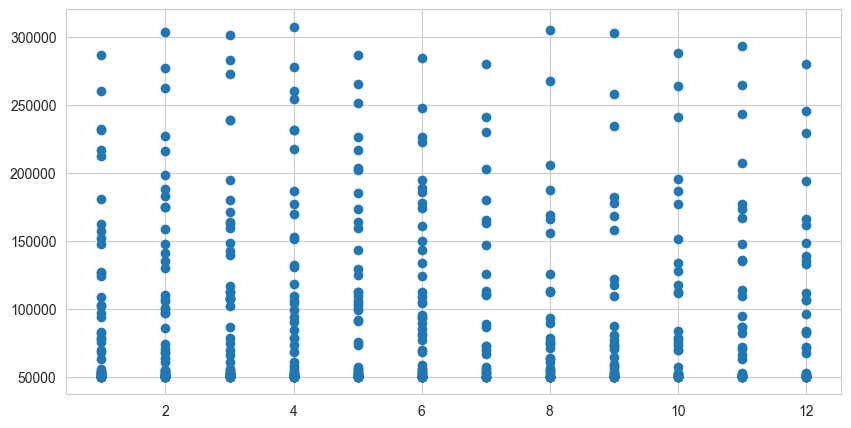

In [12]:
#Tạo biểu đồ tương quan
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.show

In [11]:
#Tạo tập dữ liệu train test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=102)
print('X train shape', x_train.shape)
print('y train shape', y_train.shape)
print('X test shape', x_test.shape)
print('y test shape', y_test.shape)

X train shape (385, 1)
y train shape (385, 1)
X test shape (97, 1)
y test shape (97, 1)


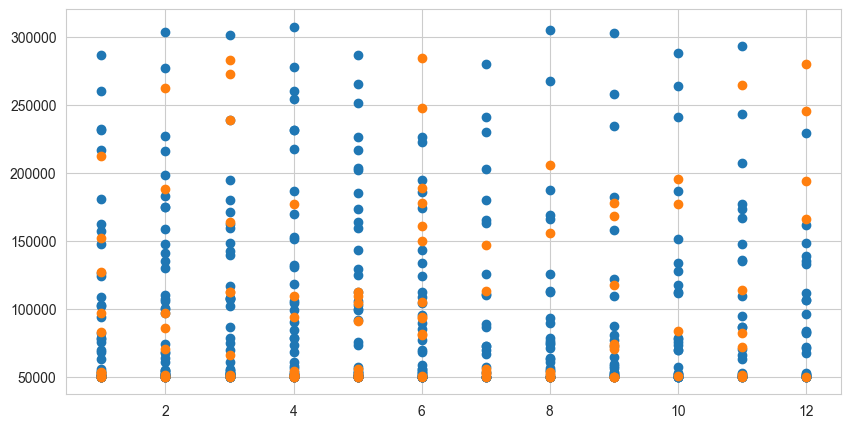

In [13]:
#Biểu đồ tương quan cho tập train và test
plt.figure(figsize=(10,5))
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.show()

In [15]:
# Lặp qua các degree và tính loss function trên trainset và testset khi áp dụng polynomialFeature
results = {'degree': [], 'train_mse': [], 'test_mse': []}

for d in range(1,100):

    degree = d

    # Define a instance of LinearRegression called 'lr'
    lr = LinearRegression()

    #Transform x to min-max-scaler
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train_scaler = scaler.transform(x_train)
    x_test_scaler = scaler.transform(x_test)

    # Define a instance of PolynomialFeatures with degree called 'poly_reg'
    poly_reg = PolynomialFeatures(degree = degree) 

    # Fit and transform 'X_train_scaler', 'X_test_scaler' with the PolynomialFeatures and save the result in 'X_train_poly' and 'X_test_poly'
    x_train_poly = poly_reg.fit_transform(x_train_scaler)
    x_test_poly = poly_reg.fit_transform(x_test_scaler)

    # Fitting the Linear Regression Model to the training set (X_train_poly)
    lr.fit(x_train_poly, y_train)

    # Predict test set and save the result in 'y_test_predict'
    y_test_predict = lr.predict(x_test_poly)
    y_train_predict = lr.predict(x_train_poly)

    # Save to result dict:
    results['degree'].append(d)
    results['train_mse'].append(mean_squared_error(y_train,y_train_predict))
    results['test_mse'].append(mean_squared_error(y_test,y_test_predict))

result_df = pd.DataFrame(results)
result_df.head()

,degree,train_mse,test_mse
0,1,4.358986e+09,4.771479e+09
1,2,4.355602e+09,4.802985e+09
2,3,4.355478e+09,4.795718e+09
3,4,4.352219e+09,4.802872e+09
4,5,4.337865e+09,4.874652e+09


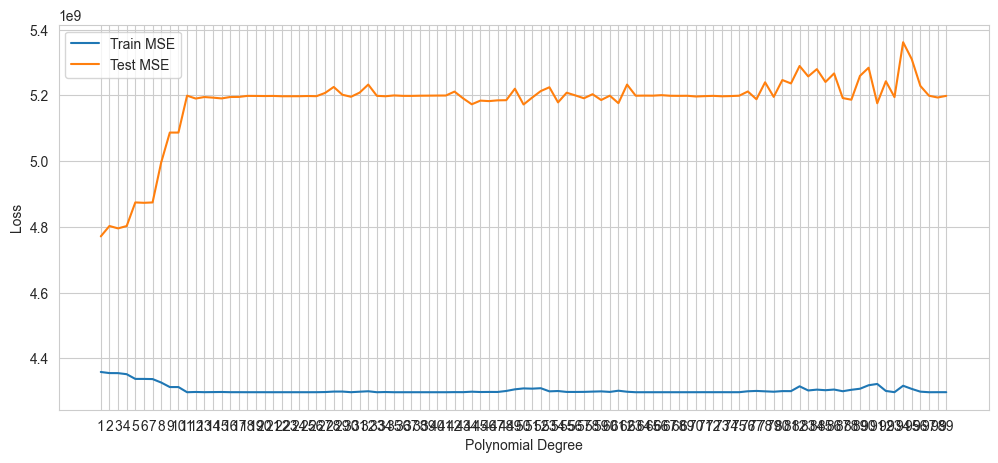

In [16]:
# Plot MSE 
fig = plt.subplots(figsize =(12, 5))
# Make the plot
plt.plot(result_df['degree'], result_df['train_mse'],label ='Train MSE')
plt.plot(result_df['degree'], result_df['test_mse'], label ='Test MSE')
 
# Adding Xticks
plt.xlabel('Polynomial Degree')
plt.ylabel('Loss')

plt.xticks(result_df['degree'])
 
plt.legend()
plt.show()

In [17]:
#Tìm min_mse của tập test do tập train -> 0
min_test = result_df.test_mse.min()
result_df[result_df.test_mse == min_test]

,degree,train_mse,test_mse
0,1,4.358986e+09,4.771479e+09


In [20]:
# Call Linear Regression model:
lr1 = LinearRegression()

# Call PolynomialFeatures :
poly_reg = PolynomialFeatures(degree = 1)

# Fit and transform 'X_train_scaler', 'X_test_scaler' with the PolynomialFeatures and save the result in 'X_train_poly' and 'X_test_poly'
x_train_poly = poly_reg.fit_transform(x_train_scaler)
x_test_poly = poly_reg.fit_transform(x_test_scaler)

# Fitting (Training model) the Linear Regression Model to the training set (X_train_poly)
lr1.fit(x_train_poly, y_train)

LinearRegression()

In [21]:
# Prediction on Train-set:
y_train_pred = lr1.predict(x_train_poly)
print(f'Train-set MSE: {mean_squared_error(y_train,y_train_pred)}')
# Predict on Test-set:
y_test_pred = lr1.predict(x_test_poly)
print(f'Test-set MSE: {mean_squared_error(y_test, y_test_pred)}')

Train-set MSE: 4358985579.429535
Test-set MSE: 4771479290.193763


In [34]:
#Predict y by using x
for i in range(7,13):
#step1: create input:
    ip = np.array([[i]])

#step2: using MinMaxScaler:
    ip_scl = scaler.transform(ip)

#step3: using polynomial:
    ip_scl_poly = poly_reg.transform(ip_scl)

#step4: predict!
    print(f'Tháng {i} có lượng DAU dự kiến là: {lr1.predict(ip_scl_poly)}')

Tháng 7 có lượng DAU dự kiến là: [[101733.55219943]]
Tháng 8 có lượng DAU dự kiến là: [[100996.2634627]]
Tháng 9 có lượng DAU dự kiến là: [[100258.97472596]]
Tháng 10 có lượng DAU dự kiến là: [[99521.68598923]]
Tháng 11 có lượng DAU dự kiến là: [[98784.39725249]]
Tháng 12 có lượng DAU dự kiến là: [[98047.10851576]]


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X doe